### Carica il modello

In [62]:
from keras.models import load_model

In [63]:
model = load_model("model_forecast5.h5")
model.load_weights("weights_forecast5.h5")

In [209]:
del model

In [412]:
pred = model.predict(X_test)
#serie_test = btc_minuto.new_data[-len(Y_test):]['CLOSE'].values

In [413]:
list_df_pred = []
for i, window in enumerate(pred):
    dfY_test[i]['pred'] = window

In [425]:
serie_test = btc_30minuti.df[-len(Y_test):][btc_30minuti.NOME_VALORE]#.values

In [66]:
#serie_test.shape, Y_test.shape, pred.shape

((872,), (872, 5), (872, 5))

In [ ]:
### giusto, inserire anche le date in x, y _train, _test

<Figure size 2160x360 with 0 Axes>

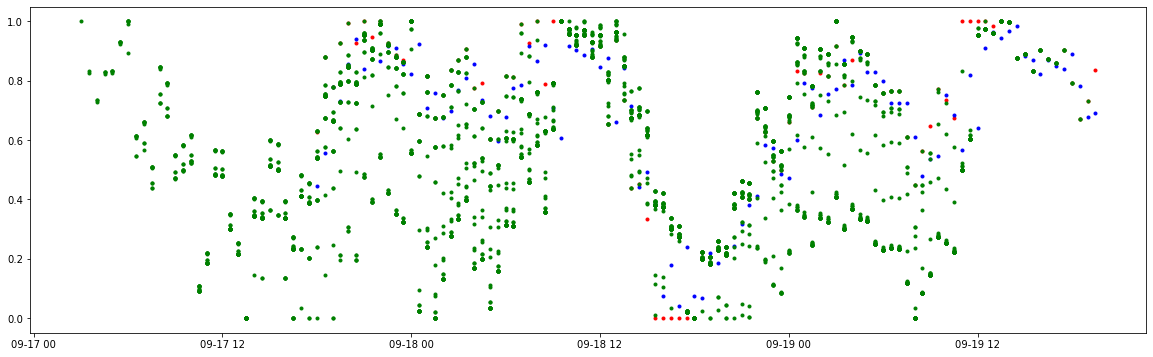

In [432]:
plt.figure(figsize=(30,5))
f, (ax1) = plt.subplots(sharex=True,figsize=(20,6))
#f, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(30,15))

single_step = 252
start, stop = (single_step, single_step+100)
new_Y_test = dfY_test[start:stop]#.reshape(-1,5,1)
new_X_test = dfX_test[start:stop]
for i, forecast_window in enumerate(new_Y_test):
    ax1.plot(forecast_window['price'], '.', color = 'red', label = 'Original data')
    ax1.plot(forecast_window['pred'], '.', color = 'blue', label = 'Predicted data')
    ax1.plot(new_X_test[i]['price'], '.', color = 'green')
    #ax1.plot(serie_test, '-.', color = 'red')

In [422]:
predic = pd.DataFrame(pred)
fact = pd.DataFrame(serie_test)
itog = pd.concat([predic, fact], axis=1)
itog.columns = (['pred', 'fact'])
itog["predUD"] = find_result(predic)
itog["factUD"] = find_result(fact)

true_long = 0
true_short = 0
vern = 0

for i in range(0,len(itog)):
    if itog["predUD"][i] > 0.5 and itog["factUD"][i] > 0.5:
        true_long = true_long + 1
    elif itog["predUD"][i] < 0.5 and itog["factUD"][i] < 0.5:
        true_short = true_short + 1
  
    if itog["predUD"][i] == itog["factUD"][i]:
        vern = vern + 1
    
per_long = round((true_long/len(itog[itog["factUD"]>0.5]))*100,2)
per_short = round((true_short/len(itog[itog["factUD"]<0.5]))*100,2)
per_vern = round((vern/len(itog))*100,2)

print("Percentage of open orders for increase:", per_long)
print("Percentage of open orders for decrease:", per_short)
print("")
print("Percentage of correct forecasts:", per_vern)
print("--------------------------------------")
itog.head()

print ("MSE =", np.mean(np.square(pred - serie_test)))
print ("MAE =", np.mean(np.abs(pred - serie_test)))
print ("MAPE =", np.mean(np.abs((serie_test - pred) / serie_test)))

KeyError: 0

# Backtest

In [2]:
from nsp.nsp_utils import segnale_base
from nsp.backtest import Backtest


CAPITALE = 1000
#@markdown The size of the commission for opening/closing an order (%).
commissioni = 0.001

In [3]:
# la serie nell'intervallo di test (diverso da X_test perché X_test è array di WINDOW)


backtest = Backtest(serie_test, CAPITALE, commissioni, commissioni_fisse=0, forecast=FORECAST)

# definisco il segnaledi compravendita e parto con il test
test_signal = segnale_base(pred, commissioni)
backtest.calcola(test_signal)

NameError: name 'serie_test' is not defined

<Figure size 2160x360 with 0 Axes>

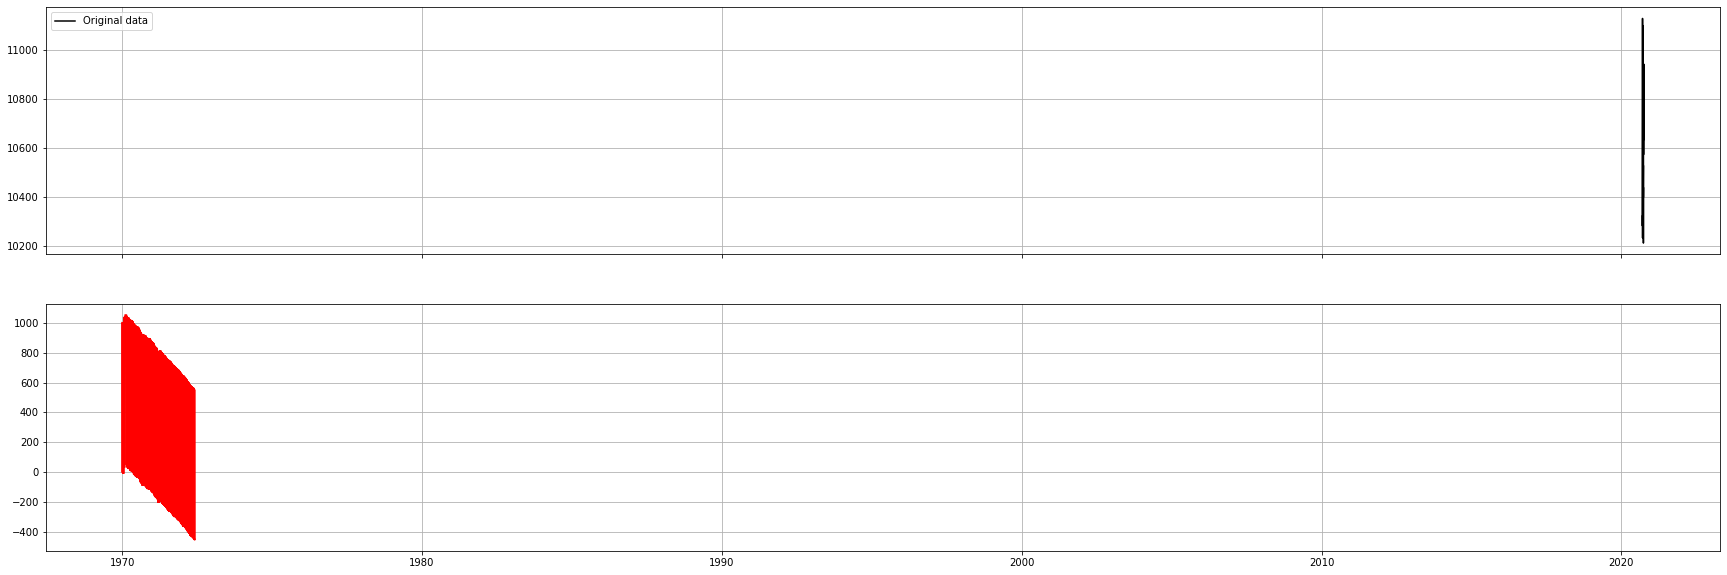

In [431]:
plt.figure(figsize=(30,5))
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(30,10))
#f, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(30,15))

start, stop = (0, -1)
ax1.plot(serie_test[start:stop], color = 'black', label = 'Original data')
#ax1.plot(pred[start:stop], color = 'blue', label = 'Predicted data')
#ax1.plot(test_signal[start:stop], color = 'green', label = 'Segnale', alpha=0.5)
ax1.legend()
ax1.grid(True, which='major')

ax2.plot(backtest.capitale_tempo[start:stop], color = 'red', label = 'Capital')
ax2.grid(True, which='major')
#ax3.plot(itog['stocks'][start:stop], color = 'brown', label = 'Stocks')
#plt.yscale('log')

plt.show()